# Histogram of the (T_b - T_cp) differences
And save the difference bin counts!

In [1]:
import pickle
import sys
sys.path.append("/home/b/b380887/cold-point-overshoot/python_scripts/")

import xarray as xr
import numpy as np
import bin_overshoot as bin_os
import bin_obs_overshoot as boo
import get_d2_data as get_d2


In [2]:
file_path = "/work/bb1153/b380887/10x10/"
pickle_dir = "/home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/"
save_dir = "/home/b/b380887/cold-point-overshoot/plots/d2_paper_poster/tb_hists/"


In [3]:
model_list = ["SCREAM", "SHIELD", "GEOS", "ICON", "SAM"]
region_list = ["AMZ", "SPC"] #, "SCA", "TIM"]


In [4]:
def save_diff_hist_dict(hist_out, model, region, pickle_dir):
    """ 
    Save the counts, bins, bin edges, and total # of points
    for one histogram as a pickled dictionary.
    """
    diff_counts, diff_bins, diff_bin_edges, n_pts = hist_out

    hist_dict = {
        "counts": diff_counts,
        "freqs": diff_counts/n_pts,
        "bins": diff_bins,
        "edges": diff_bin_edges,
        "n_pts": n_pts
    }

    out_file = pickle_dir + "{m}_Tb-cpT_histogram_dict_{r}.pickle".format(m=model, r=region)
    with open(out_file, "wb") as handle:
        pickle.dump(hist_dict, handle)
        
    print("dictionary saved to", out_file)
    

In [5]:
save = True
ylim = (0, 0.5)


#### Models

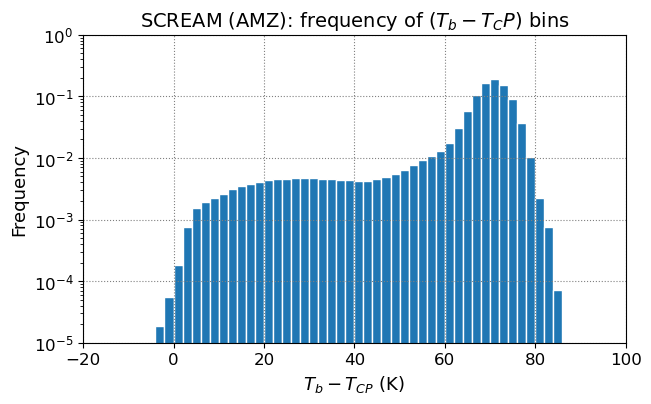

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SCREAM_Tb-cpT_histogram_dict_AMZ.pickle


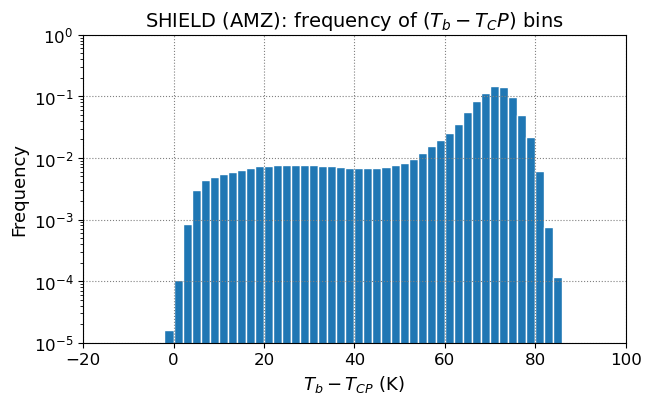

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SHIELD_Tb-cpT_histogram_dict_AMZ.pickle


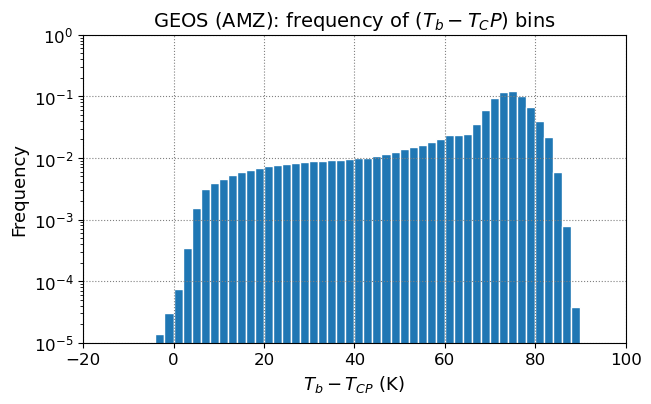

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/GEOS_Tb-cpT_histogram_dict_AMZ.pickle


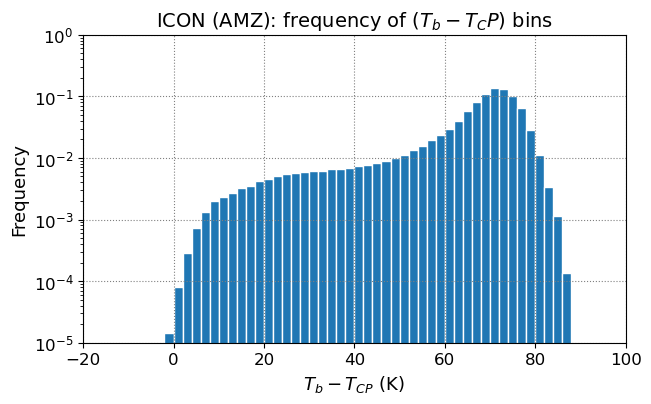

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/ICON_Tb-cpT_histogram_dict_AMZ.pickle


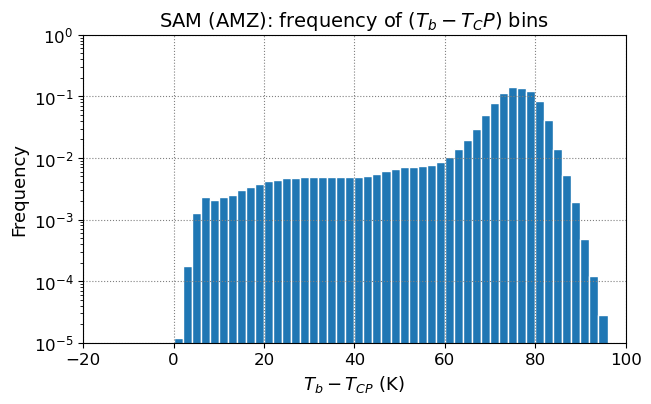

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SAM_Tb-cpT_histogram_dict_AMZ.pickle


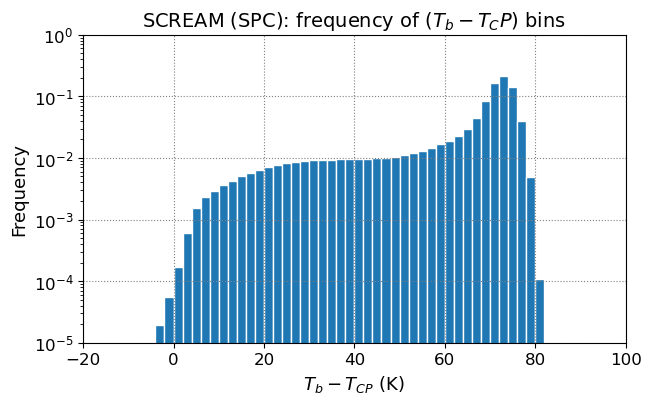

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SCREAM_Tb-cpT_histogram_dict_SPC.pickle


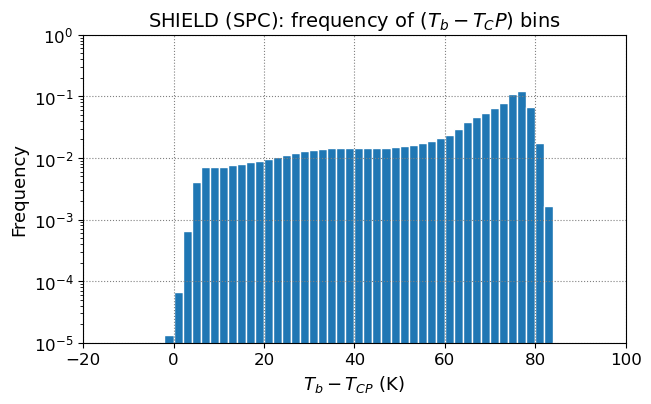

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SHIELD_Tb-cpT_histogram_dict_SPC.pickle


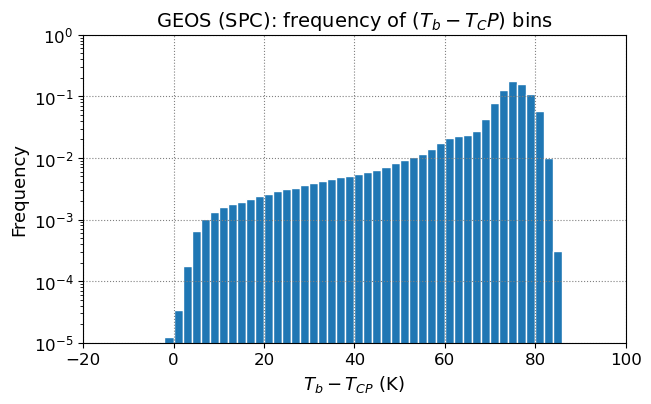

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/GEOS_Tb-cpT_histogram_dict_SPC.pickle


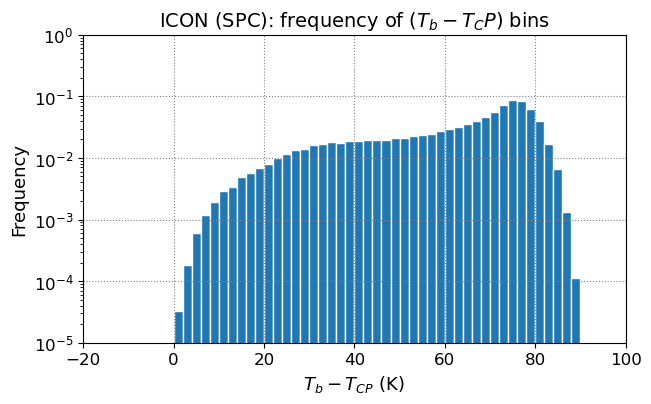

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/ICON_Tb-cpT_histogram_dict_SPC.pickle


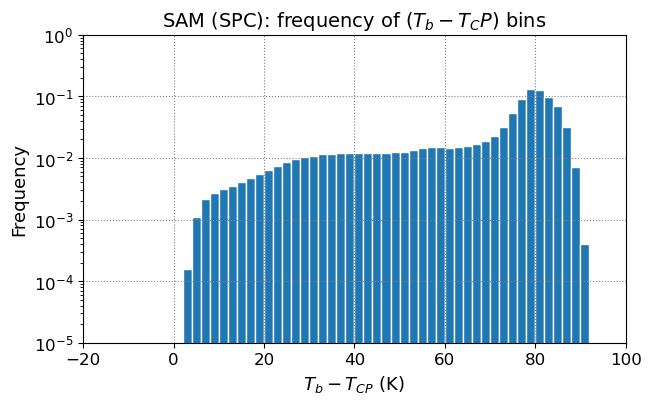

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SAM_Tb-cpT_histogram_dict_SPC.pickle


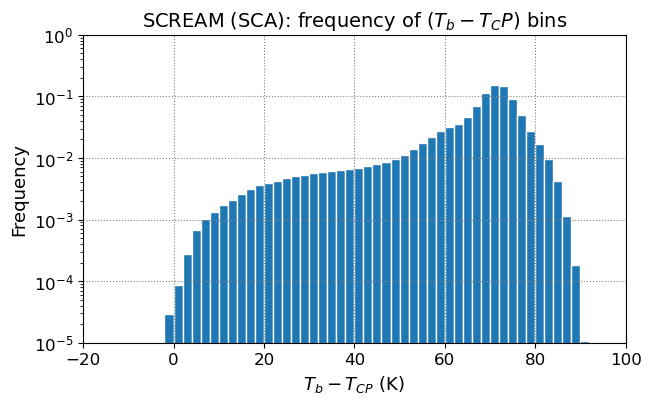

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SCREAM_Tb-cpT_histogram_dict_SCA.pickle


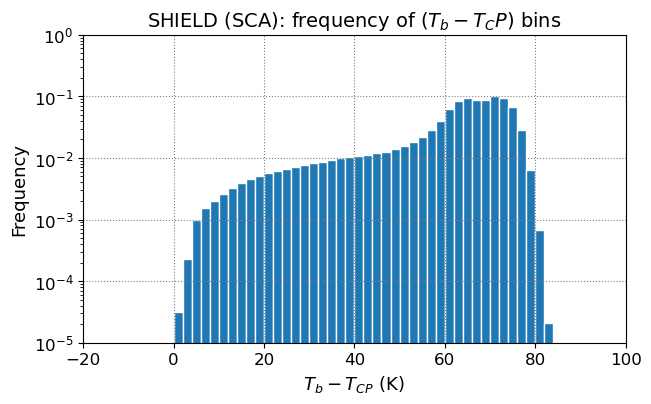

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SHIELD_Tb-cpT_histogram_dict_SCA.pickle


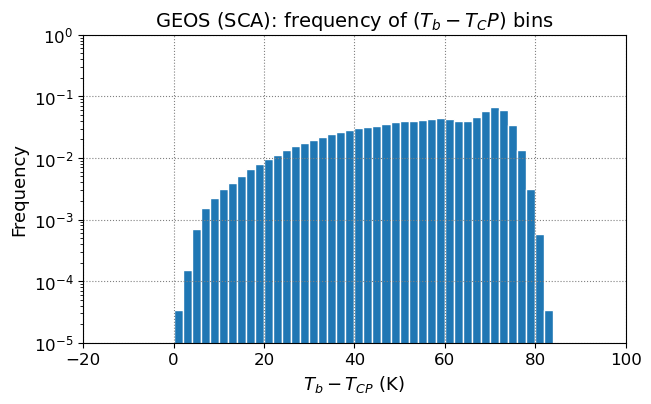

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/GEOS_Tb-cpT_histogram_dict_SCA.pickle


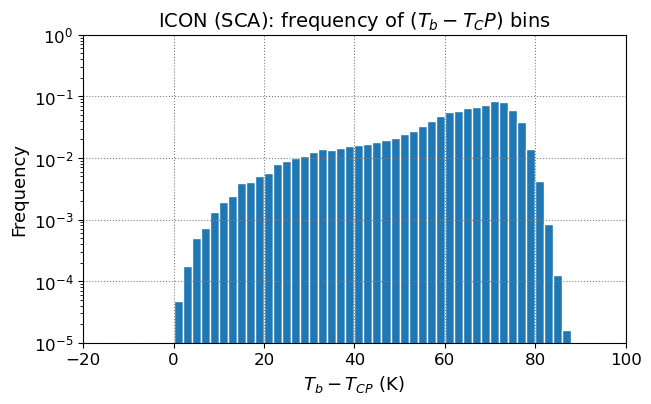

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/ICON_Tb-cpT_histogram_dict_SCA.pickle


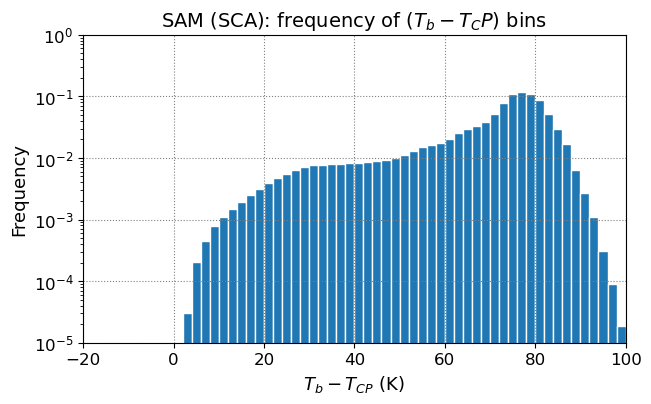

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SAM_Tb-cpT_histogram_dict_SCA.pickle


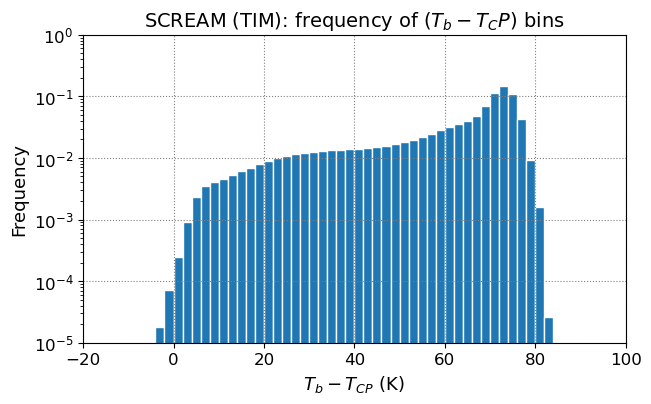

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SCREAM_Tb-cpT_histogram_dict_TIM.pickle


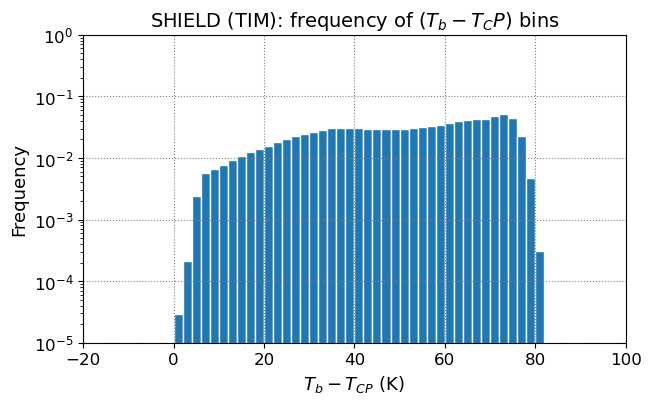

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SHIELD_Tb-cpT_histogram_dict_TIM.pickle


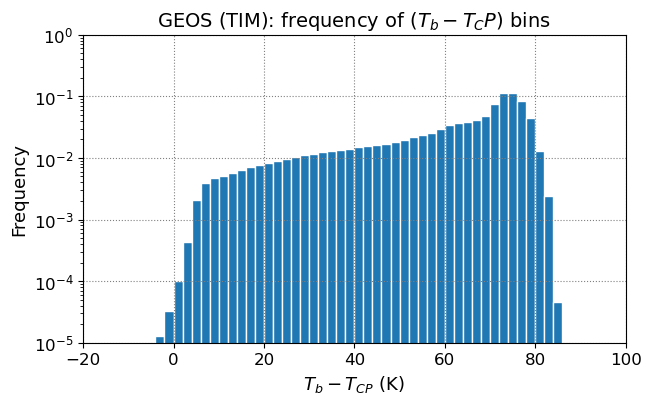

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/GEOS_Tb-cpT_histogram_dict_TIM.pickle


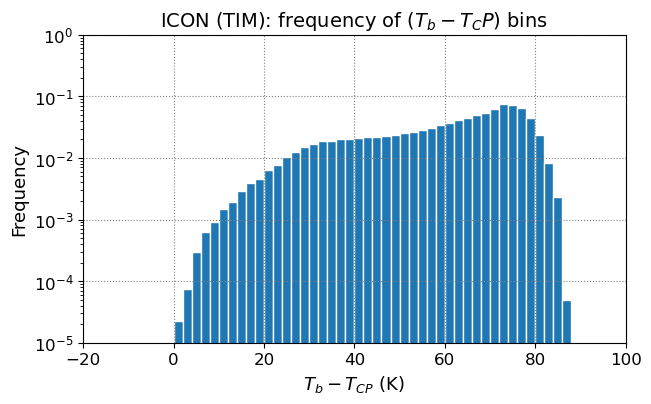

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/ICON_Tb-cpT_histogram_dict_TIM.pickle


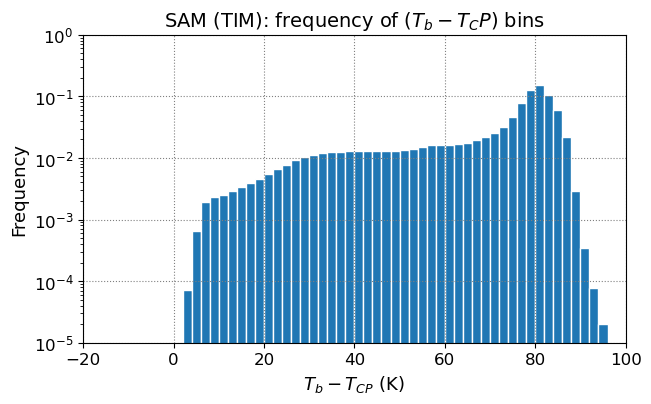

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SAM_Tb-cpT_histogram_dict_TIM.pickle


In [6]:
for region in region_list:
    for model in model_list:
        tb = get_d2.get_brightness_temp(region, model, file_path)
        cpT = get_d2.get_cold_point(region, model, file_path)

        if len(tb.time) < len(cpT.time):
            cpT = cpT.sel(time=tb.time)
        elif len(cpT.time) < len(tb.time):
            tb = tb.sel(time=cpT.time)

        diffs = tb - cpT
        
        # set chunks = None so it uses numpy
        # (weird things happen at the smallest/largest bins with dask)
        hist_out = bin_os.plot_diffs_hist(diffs, model, region, ylim=ylim,
                                         return_hist=True, save=True, save_dir=save_dir,
                                          chunks=None, ylog=True
                                        )
        save_diff_hist_dict(hist_out, model, region, pickle_dir=pickle_dir)
        


## Temp - get the vertical grid spacing (had this in a diff notebook but lost it!)

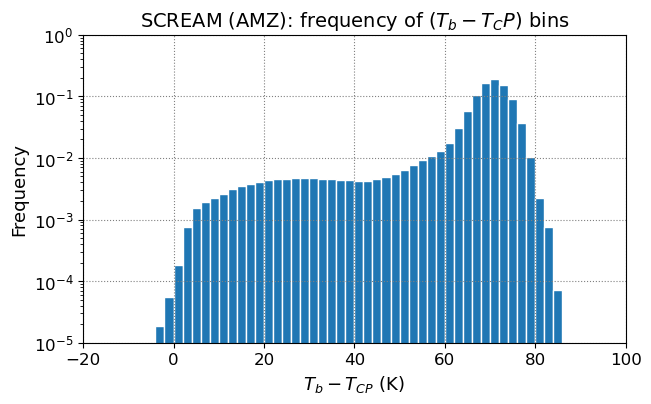

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SCREAM_Tb-cpT_histogram_dict_AMZ.pickle


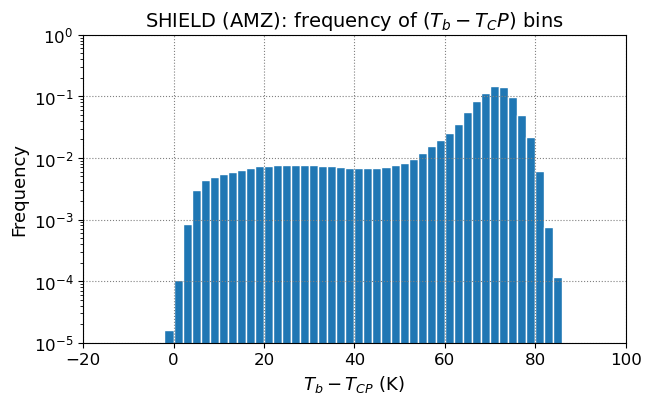

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SHIELD_Tb-cpT_histogram_dict_AMZ.pickle


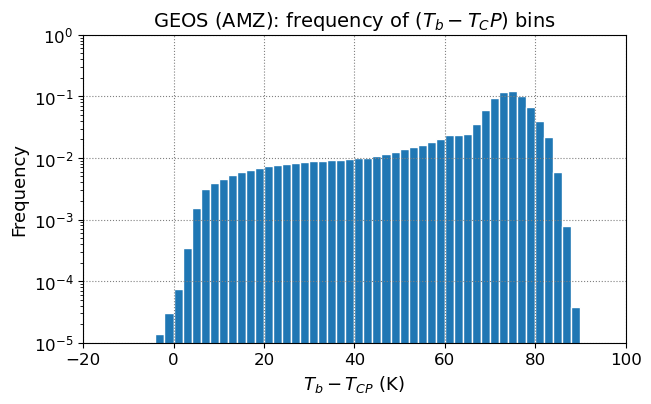

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/GEOS_Tb-cpT_histogram_dict_AMZ.pickle


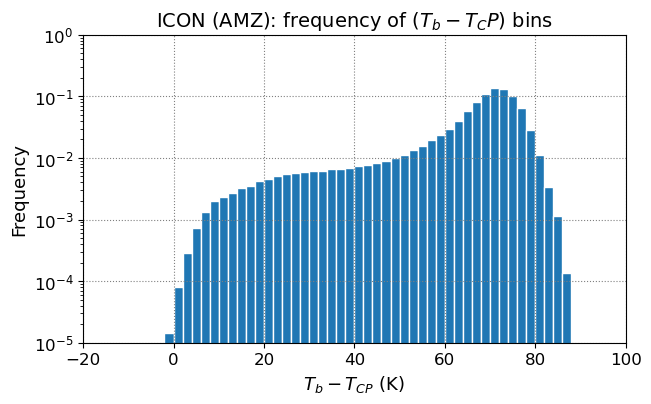

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/ICON_Tb-cpT_histogram_dict_AMZ.pickle


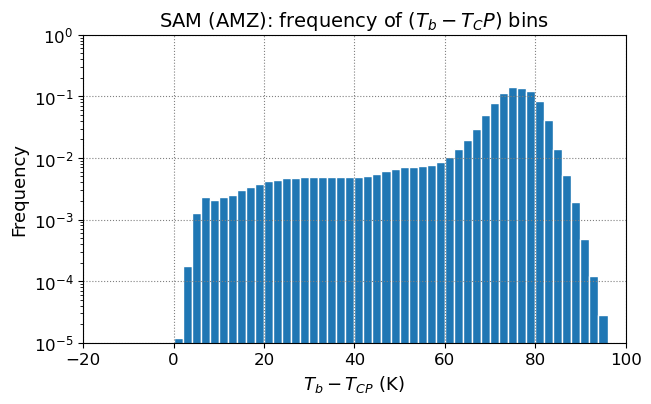

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SAM_Tb-cpT_histogram_dict_AMZ.pickle


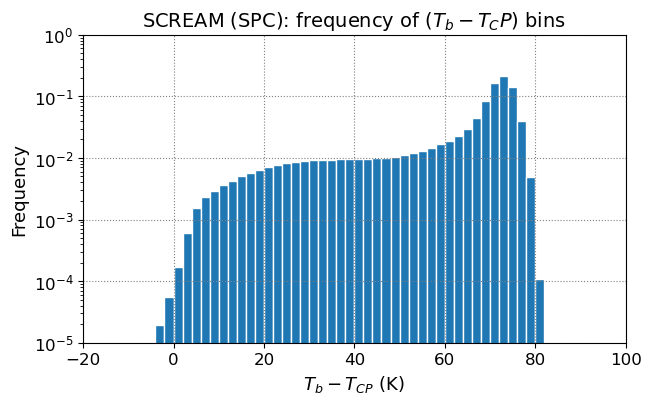

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SCREAM_Tb-cpT_histogram_dict_SPC.pickle


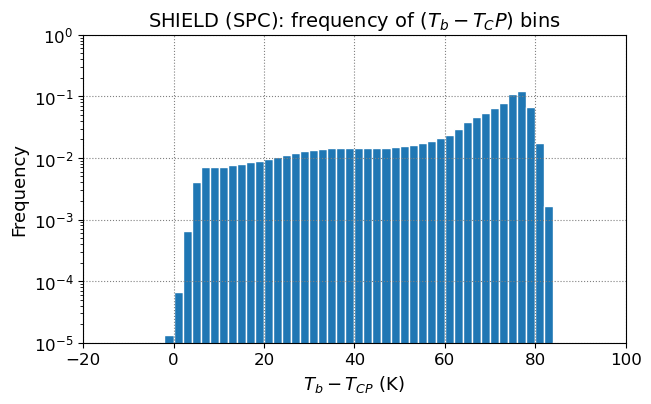

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SHIELD_Tb-cpT_histogram_dict_SPC.pickle


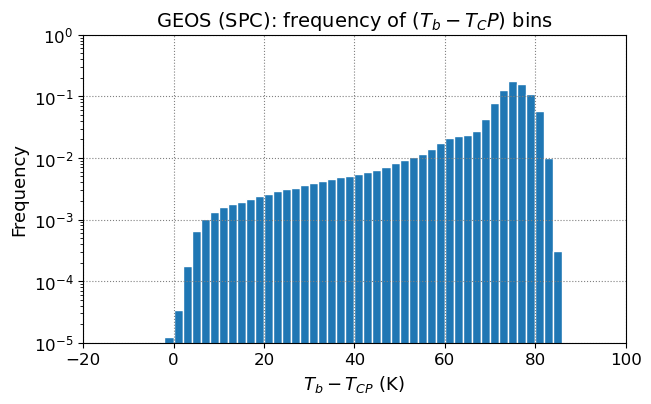

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/GEOS_Tb-cpT_histogram_dict_SPC.pickle


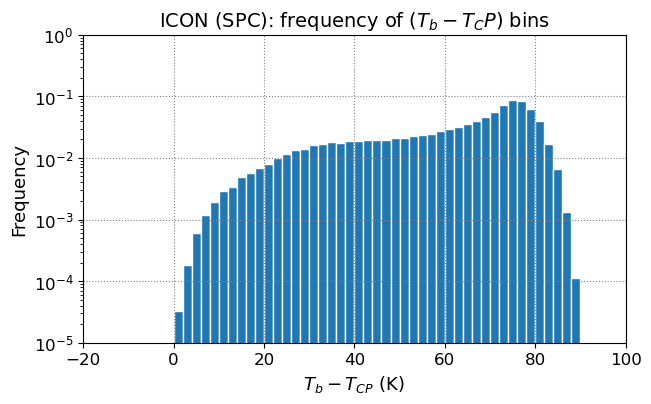

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/ICON_Tb-cpT_histogram_dict_SPC.pickle


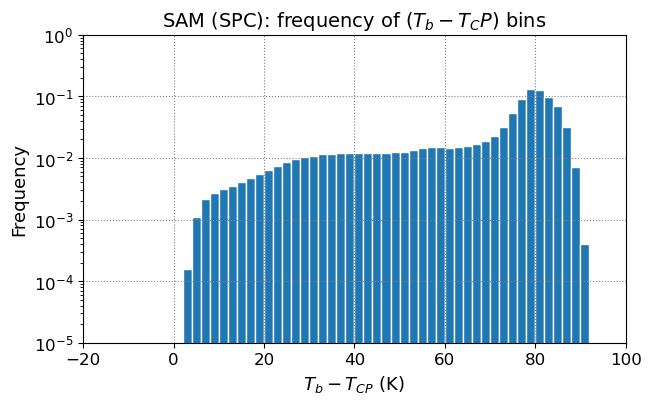

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SAM_Tb-cpT_histogram_dict_SPC.pickle


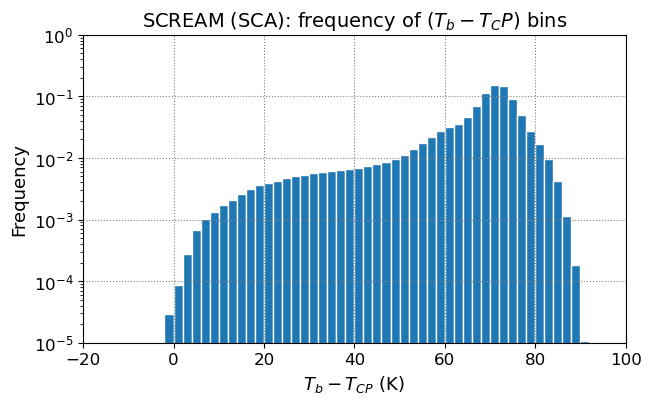

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SCREAM_Tb-cpT_histogram_dict_SCA.pickle


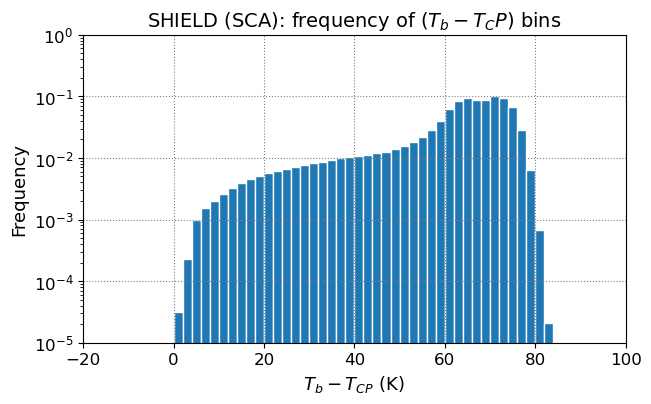

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SHIELD_Tb-cpT_histogram_dict_SCA.pickle


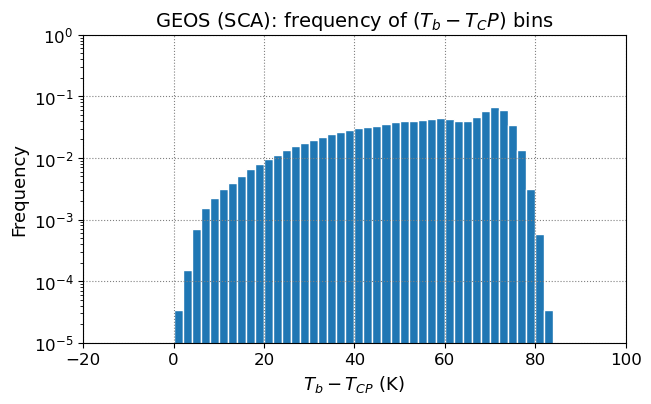

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/GEOS_Tb-cpT_histogram_dict_SCA.pickle


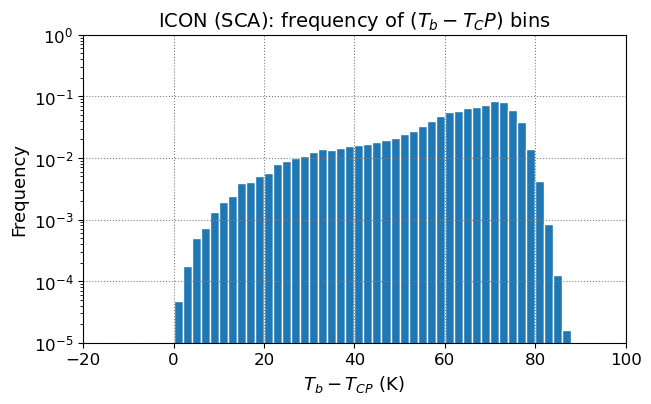

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/ICON_Tb-cpT_histogram_dict_SCA.pickle


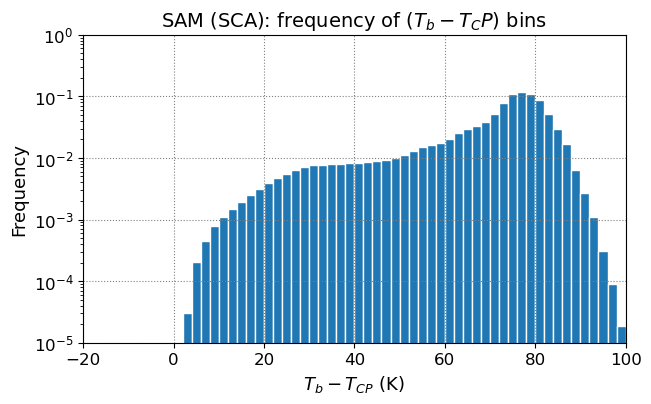

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SAM_Tb-cpT_histogram_dict_SCA.pickle


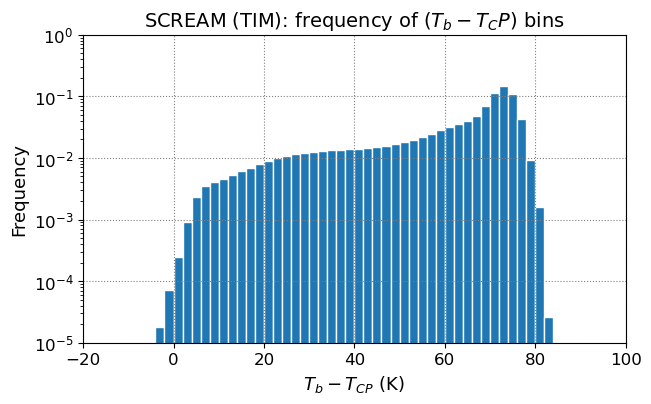

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SCREAM_Tb-cpT_histogram_dict_TIM.pickle


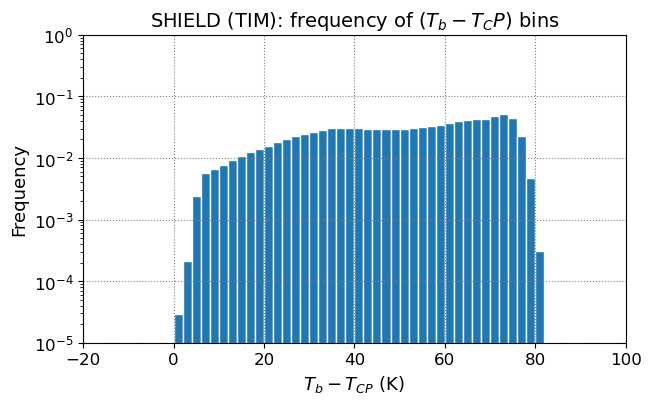

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SHIELD_Tb-cpT_histogram_dict_TIM.pickle


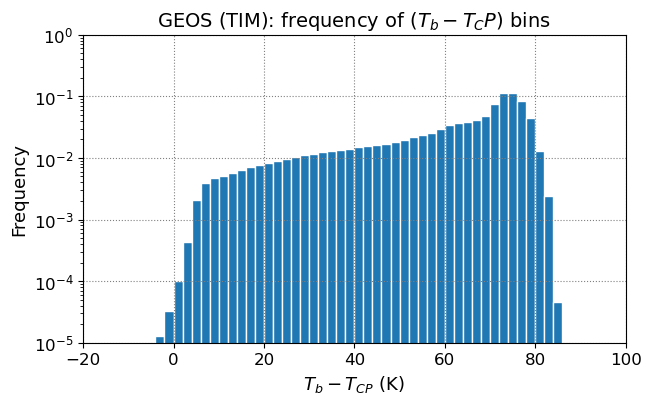

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/GEOS_Tb-cpT_histogram_dict_TIM.pickle


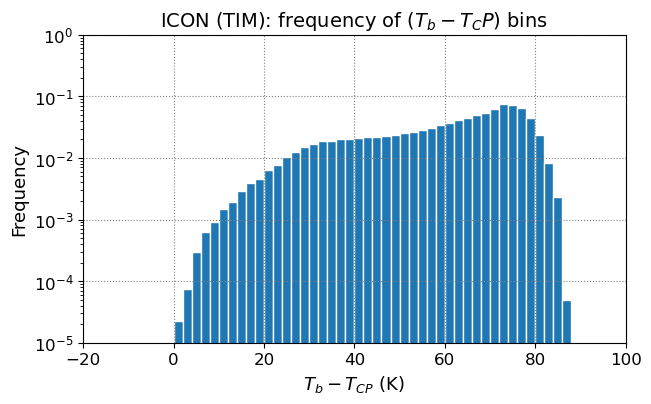

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/ICON_Tb-cpT_histogram_dict_TIM.pickle


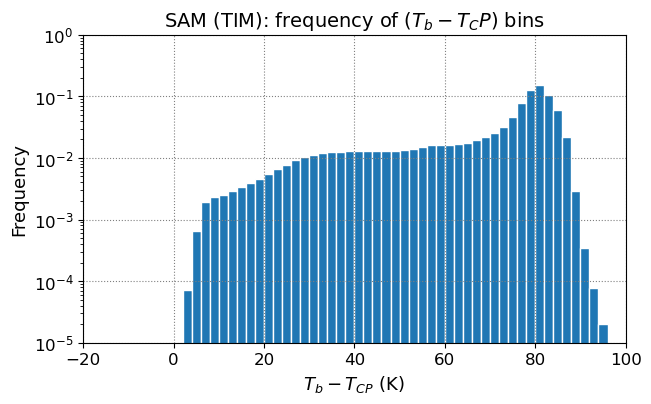

dictionary saved to /home/b/b380887/cold-point-overshoot/pickle_files/new_d2_tb_hists/SAM_Tb-cpT_histogram_dict_TIM.pickle


In [6]:
for region in region_list:
    for model in model_list:
        tb = get_d2.get_brightness_temp(region, model, file_path)
        cpT = get_d2.get_cold_point(region, model, file_path)

        if len(tb.time) < len(cpT.time):
            cpT = cpT.sel(time=tb.time)
        elif len(cpT.time) < len(tb.time):
            tb = tb.sel(time=cpT.time)

        diffs = tb - cpT
        
        # set chunks = None so it uses numpy
        # (weird things happen at the smallest/largest bins with dask)
        hist_out = bin_os.plot_diffs_hist(diffs, model, region, ylim=ylim,
                                         return_hist=True, save=True, save_dir=save_dir,
                                          chunks=None, ylog=True
                                        )
        save_diff_hist_dict(hist_out, model, region, pickle_dir=pickle_dir)
        


#### Observations
At times of DARDAR retrievals only

In [6]:
year_list = [2007, 2008, 2009, 2010]


In [7]:
%%time

diffs_dar_dict = {}
ds_dar_dict = {}

for region in region_list:
    diffs_dar_list = [[]]*len(year_list)

    ds_dar_list = [
        xr.open_dataset(file_path + "{r}/DARDAR-v3_iwc_{s}{y}_{r}.nc".format(s="DJF", y=year, r=region))
        for year in year_list
    ]
    output_list = [
        boo.get_data("DJF", year, region, file_path=file_path+region+"/", bin_by_diffs=True)
        for year in year_list
    ]
    tb_list = [output_list[i][1] for i in range(len(output_list))]
    cpT_ri_list = [output_list[i][2] for i in range(len(output_list))]

    for i, ds_dar in enumerate(ds_dar_list):
        iwc = ds_dar["iwc"]
        iwc2d = iwc.isel(height=0)
        tb_dar = tb_list[i].sel(time=iwc.time, lat=iwc2d.lat, lon=iwc2d.lon, method="nearest")
        cpT_ri_dar = cpT_ri_list[i].sel(time=iwc.time, lat=iwc2d.lat, lon=iwc2d.lon, method="nearest")
        diffs_dar_vals = tb_dar.values - cpT_ri_dar.values
        diffs_dar = xr.DataArray(diffs_dar_vals, dims=["time"], coords={"time": iwc.time})
        diffs_dar_list[i] = diffs_dar

    diffs_dar_dict[region] = xr.concat(diffs_dar_list, dim="time")
    ds_dar_dict[region] = ds_dar_list
    print(region, "done")


AMZ done
SPC done
CPU times: user 1.47 s, sys: 610 ms, total: 2.08 s
Wall time: 2.99 s


In [8]:
def save_diff_hist_dict(hist_out, season, years_str, region, pickle_dir):
    """ 
    Save the counts, bins, bin edges, and total # of points
    for one histogram as a pickled dictionary.
    """
    diff_counts, diff_bins, diff_bin_edges, n_pts = hist_out

    hist_dict = {
        "counts": diff_counts,
        "freqs": diff_counts/n_pts,
        "bins": diff_bins,
        "edges": diff_bin_edges,
        "n_pts": n_pts
    }

    out_file = pickle_dir + "Tb-cpT_histogram_dict_DJF{y}_{r}.pickle".format(y=years_str, r=region)
    with open(out_file, "wb") as handle:
        pickle.dump(hist_dict, handle)
        
    print("dictionary saved to", out_file)
    

In [8]:
save = True
ylim = (1e-5, 1)


In [9]:
years_str = "2007-2010"

In [32]:
import importlib
importlib.reload(boo)

<module 'bin_obs_overshoot' from '/home/b/b380887/cold-point-overshoot/python_scripts/bin_obs_overshoot.py'>

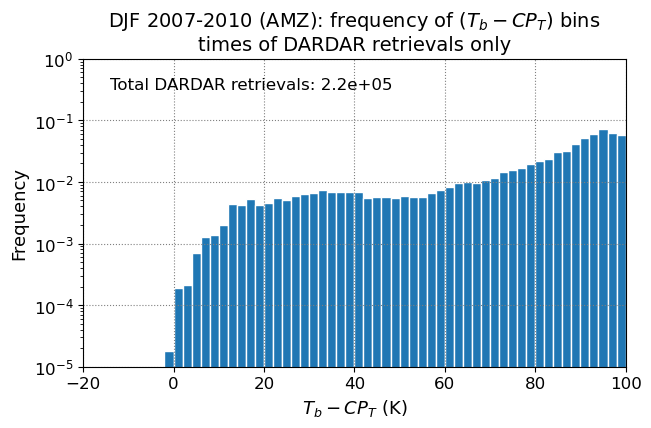

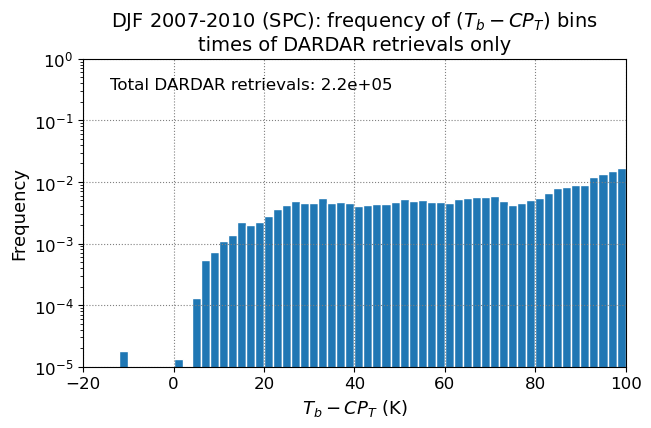

In [19]:
for region in region_list:
    diffs_dar_cat = diffs_dar_dict[region]
    ds_dar_list = ds_dar_dict[region]
    
    hist_out = boo.plot_diffs_hist(diffs_dar_cat, "DJF", region, years_str, 
                                 dar_times_only=True, annotate_total=True,
                                 dar_list_ds=ds_dar_list, ylim=ylim,
                                 return_hist=True, save=save, save_dir=save_dir,
                                   ylog=True
                                )
    # save_diff_hist_dict(hist_out, "DJF", years_str, region, pickle_dir)
